<a href="https://colab.research.google.com/github/rroyc20/Ybigta-21-/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84%26%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60점만점에 40점 이상시 통과입니다~

## Q1. 통계분석 (50점)

아래의 df는 타이타닉 데이터셋에서 추출된 표본이다. 적절한 전처리를 한 뒤 통계분석을 수행하시오.

### 신뢰구간 (25점)

Age 변수의 분포를 시각화하고, 분포를 묘사하시오. (10점)

    - 중앙 (3점)
    - 분산 (3점)
    - 모양과 이상치 유무 (4점)
    
    
표본의 평균 나이로 95% 신뢰구간을 구축하시오. (15점)

    - 신뢰구간 선정 (5점)
    - 구간 계산 (5점)
    - 구간 해석 (5점)
    
### 가설검정 (25점)

살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있습니까?

    - 가설 (5점)
    - 검정 선택 후 가정 확인 (10점)
    - 통계량 계산 (5점)
    - 결과 해석 (5점)

주의! 세션에서는 단일표본 t 검정을 했지만, 여기엔 모집단이 두개입니다!


<details>
    <summary>힌트는 <font color="red"><b>여기를 클릭</b></font></summary>
  
  만약 직접 t 통계량을 계산하기 까다롭다면, scipy.stats.ttest_ind_from_stats를 사용해 봅시다.
    
  scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')
</details>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ybigta 방학세션/통계기초 회귀분석/train (2).csv')
df = df.sample(75, random_state=1)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [14]:
del df['PassengerId']

In [15]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [17]:
df.drop('Cabin', axis = 1, inplace = True)

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
862,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,S
223,0,3,"Nenkoff, Mr. Christo",male,28.234375,0,0,349234,7.8958,S
84,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,S
680,0,3,"Peters, Miss. Katie",female,28.234375,0,0,330935,8.1375,Q
535,1,2,"Hart, Miss. Eva Miriam",female,7.000000,0,2,F.C.C. 13529,26.2500,S


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.426667,2.266667,28.234375,0.600000,0.520000,34.533947
std,0.497924,0.827457,11.626789,1.325427,1.069984,66.616450
min,0.000000,1.000000,1.000000,0.000000,0.000000,7.050000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,9.981250
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000
75%,1.000000,3.000000,35.000000,1.000000,0.500000,31.331250
max,1.000000,3.000000,61.000000,8.000000,5.000000,512.329200


Text(0.5, 1.0, 'Sample Age')

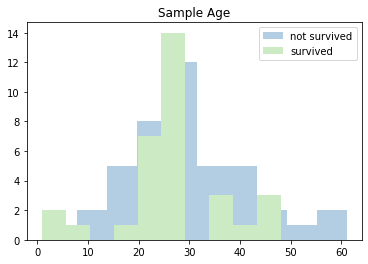

In [22]:
plt.hist(df[df['Survived'] == 0]['Age'], color = plt.cm.Pastel1(1), label = 'not survived')
plt.hist(df[df['Survived'] == 1]['Age'], color = plt.cm.Pastel1(2), label = 'survived')
plt.legend()
plt.title('Sample Age')

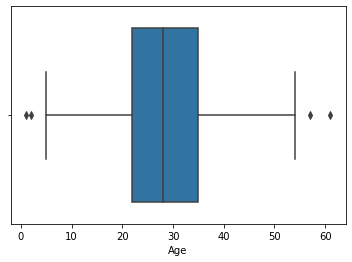

In [25]:
sns.boxplot(x =df['Age'] )

In [30]:
age = list(df['Age'])

In [23]:
df.Age.describe()

count    75.000000
mean     28.234375
std      11.626789
min       1.000000
25%      22.000000
50%      28.000000
75%      35.000000
max      61.000000
Name: Age, dtype: float64

중앙 : 28
표본 평균 : 28.23
표본 표준편차 : 11.63

In [32]:
for i in range(len(df)):
  if age[i]< 22-13*1.5 or age[i] > 35+13*1.5:
    print(age[i])
  #boxplot기준 이상치 출력

1.0
61.0
2.0
57.0


#신뢰구간

###신뢰구간 설정

In [33]:
from scipy import stats
import numpy as np

In [35]:
mean = df['Age'].mean()
dof = len(df) - 1
critical_value = stats.t.ppf(0.975, dof, 0, 1)
print(f"critic_value : {critical_value}")
std_error = df['Age'].std()/np.sqrt(75)
print(f"std_error : {std_error}")

critic_value : 1.99254349484682
std_error : 1.3425459459985407


###구간 계산

In [36]:
interval = (mean - critical_value + std_error, mean + critical_value + std_error)

In [37]:
print(interval)

(27.58437745115172, 31.569464440845362)


### 구간 해석
신뢰구간의 결과를 통해 우리는 age의 모평균이 (27.58437745115172, 31.569464440845362) 구간에 95%의 확률로 존재한다는 것을 알 수 있다.

#가설검정


###가설
살아남은 사람과 살아남지 못한 사람간의 차이가 존재하는지를 확인하고 싶기 때문에 m1을 살아남은 사람의 평균, m2를 살아남지 못한 사람의 평균이라고 했을 때 가설은 다음과 같다.

H0: m1 = m2
####H1: m1과 m2는 같지 않다.

###검정 선택 후 가정 확인
표준편차에 대한 정보가 없기 떄문에 t 검정을 통해 가설검정을 진행

In [40]:
df1 = df.loc[df.Survived == 1]
df1 = df1['Age']
display(df1.shape)

df0 = df.loc[df.Survived == 0]
df0 = df0['Age']
display(df0.shape)

(32,)

(43,)

두 집단 모두 random하게 추출되었기 떄문에 randomness가 보장되고, 표본의 크기 또한 30보다 크기 때문에 큰 수의 법칙에 의해 normality또한 보장된다. 또한 survived란 column의 값이 다른 두 집단이므로 독립이라고 볼 수 있다.

### 통계량 계산


In [41]:
stats.ttest_ind_from_stats(df1.mean(), df1.std(), df1.shape[0], df0.mean(), df0.std(), df0.shape[0], equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.9138710555393881, pvalue=0.3637931994699718)

### 결과 해석


t 값이 기각역에 존재할 확률인 p값이 유의수준인 0.05보다 크기 때문에 우리는 H0를 기각할 수 없다. 따라서 두 집단의 평균 나이에 큰 차이는 없다고 볼 수 있다.

## Q2. 회귀분석

다음 데이터셋에 대해 두가지 방법으로 회귀식을 도출하시오

In [63]:
reviews = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ybigta 방학세션/통계기초 회귀분석/reviews (1).xlsx')
x = reviews['kakao'].values
y = reviews['naver'].values

### Ordinary Least Squares (10점)

다음 수식을 numpy를 사용하여 재현해보시오

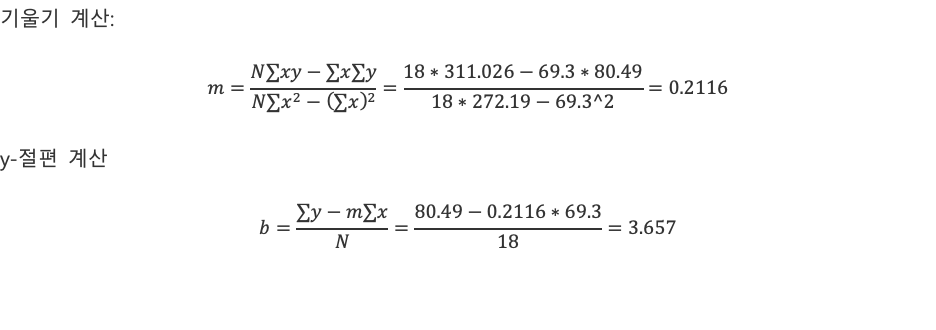


In [64]:
x = list(x)
y = list(y)
print(x,y)

[4.1, 4.0, 3.9, 4.4, 4.3, 4.3, 3.9, 4.2, 4.2, 3.3, 3.5, 3.7, 4.3, 2.0, 3.5, 3.8, 3.7, 4.2] [4.46, 4.48, 4.53, 4.55, 4.49, 4.81, 4.53, 4.49, 4.5, 4.3, 4.48, 4.33, 4.47, 4.1, 4.51, 4.34, 4.35, 4.77]


In [65]:
xy = 0
xx = 0
yy = 0
for i in range(len(x)):
  xy += x[i]*y[i]
  xx += x[i]**2
  yy += y[i]**2
sumx = sum(x)
sumy = sum(y)
n = len(x)
print(xy, xx, yy, sumx, sumy, n)

311.02600000000007 272.18999999999994 360.36390000000006 69.3 80.49 18


In [66]:
m = (n*xy - sumx*sumy)/(n*xx - sumx**2)
b = (sumy - m*sumx)/n

In [67]:
print(f'm = {m}')
print(f'b = {b}')

m = 0.21160631383474118
b = 3.656982358402913
